In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [4]:
df = pd.read_csv('YESBANK.csv')

In [5]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-12-07,14.040000,14.150000,14.000000,14.050000,12.694315,975450.0
1,2005-12-08,14.160000,14.280000,14.050000,14.180000,12.811771,1368365.0
2,2005-12-09,14.290000,14.340000,14.170000,14.200000,12.829840,1369180.0
3,2005-12-12,14.220000,14.320000,13.820000,13.960000,12.613000,1313620.0
4,2005-12-13,13.980000,14.150000,13.830000,14.020000,12.667209,1556415.0
...,...,...,...,...,...,...,...
4487,2024-02-05,23.700001,23.799999,22.600000,22.799999,22.799999,225297171.0
4488,2024-02-06,23.100000,25.700001,23.000000,25.400000,25.400000,807723717.0
4489,2024-02-07,26.100000,30.450001,25.950001,29.799999,29.799999,541684682.0
4490,2024-02-08,31.100000,32.700001,28.900000,30.000000,30.000000,964634649.0


In [6]:
df.describe

<bound method NDFrame.describe of             Date       Open       High        Low      Close  Adj Close  \
0     2005-12-07  14.040000  14.150000  14.000000  14.050000  12.694315   
1     2005-12-08  14.160000  14.280000  14.050000  14.180000  12.811771   
2     2005-12-09  14.290000  14.340000  14.170000  14.200000  12.829840   
3     2005-12-12  14.220000  14.320000  13.820000  13.960000  12.613000   
4     2005-12-13  13.980000  14.150000  13.830000  14.020000  12.667209   
...          ...        ...        ...        ...        ...        ...   
4487  2024-02-05  23.700001  23.799999  22.600000  22.799999  22.799999   
4488  2024-02-06  23.100000  25.700001  23.000000  25.400000  25.400000   
4489  2024-02-07  26.100000  30.450001  25.950001  29.799999  29.799999   
4490  2024-02-08  31.100000  32.700001  28.900000  30.000000  30.000000   
4491  2024-02-09  30.200001  32.849998  29.250000  31.400000  31.400000   

           Volume  
0        975450.0  
1       1368365.0  
2    

In [7]:
df.sum()

Date         2005-12-072005-12-082005-12-092005-12-122005-1...
Open                                             413067.360162
High                                             419991.239736
Low                                              405157.209862
Close                                            412267.259566
Adj Close                                        396106.272338
Volume                                          232859496664.0
dtype: object

In [8]:
df.isnull().sum()

Date         0
Open         7
High         7
Low          7
Close        7
Adj Close    7
Volume       7
dtype: int64

In [9]:
# Extract rows with null values in any of the specified columns
null_rows = df[df.isnull().any(axis=1)]

print("Rows with null values:")
print(null_rows)

Rows with null values:
            Date  Open  High  Low  Close  Adj Close  Volume
1026  2010-02-06   NaN   NaN  NaN    NaN        NaN     NaN
1504  2012-01-07   NaN   NaN  NaN    NaN        NaN     NaN
1543  2012-03-03   NaN   NaN  NaN    NaN        NaN     NaN
1673  2012-09-08   NaN   NaN  NaN    NaN        NaN     NaN
1715  2012-11-11   NaN   NaN  NaN    NaN        NaN     NaN
2052  2014-03-22   NaN   NaN  NaN    NaN        NaN     NaN
2281  2015-02-28   NaN   NaN  NaN    NaN        NaN     NaN


In [10]:
# Remove rows with null values
df.dropna(inplace=True)

# Verify if null rows are removed
print("Null values in each column after removing null rows:")
print(df.isnull().sum())


Null values in each column after removing null rows:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4485 entries, 0 to 4491
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4485 non-null   object 
 1   Open       4485 non-null   float64
 2   High       4485 non-null   float64
 3   Low        4485 non-null   float64
 4   Close      4485 non-null   float64
 5   Adj Close  4485 non-null   float64
 6   Volume     4485 non-null   float64
dtypes: float64(6), object(1)
memory usage: 280.3+ KB


In [23]:
X = df[['Open','High','Low','Adj Close','Volume']]
y = df['Close']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [25]:
model = LinearRegression()

In [26]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [27]:
# Make predictions
y_pred = model.predict(X_test)


In [28]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 1.233458292745632
R^2 Score: 0.9998640330704025


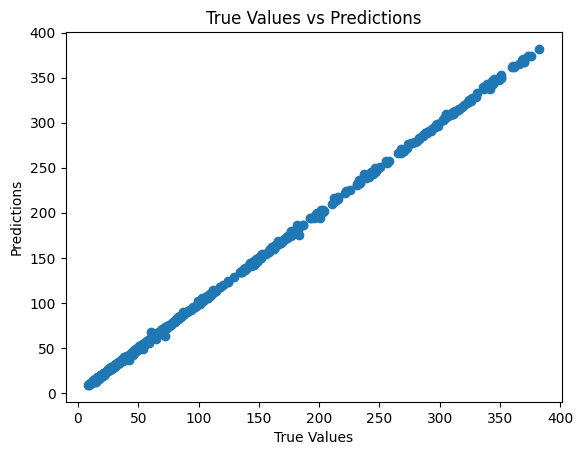

In [29]:
# Visualize the predictions
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs Predictions")
plt.show()


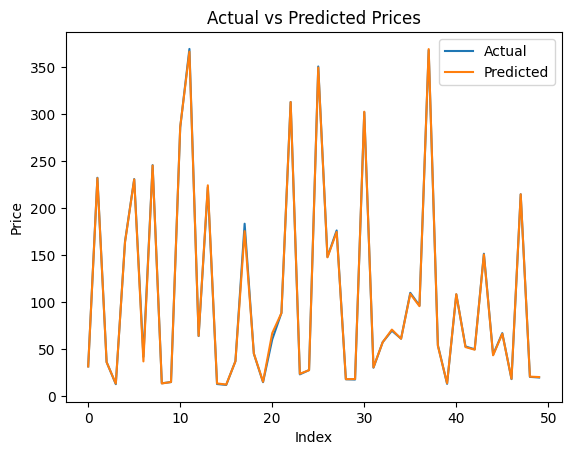

In [30]:
# Plotting a sample of the actual vs predicted prices
plt.plot(y_test[:50].values, label='Actual')
plt.plot(y_pred[:50], label='Predicted')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()

In [32]:
# Generate future dates from 12-02-2024 till 31-12-2024
future_dates = pd.date_range(start='2024-02-12', end='2024-12-31')

# Create a DataFrame with these future dates
future_df = pd.DataFrame({'Date': future_dates})

# Assuming 'Open', 'High', 'Low', and 'Volume' are available for prediction
# You might need to fill these values according to your use case

last_row = df.iloc[-1]  # Get the last row of historical data
future_df['Open'] = last_row['Open']
future_df['High'] = last_row['High']
future_df['Low'] = last_row['Low']
future_df['Volume'] = last_row['Volume']

# Use the trained model to predict the closed stock price for future dates
future_predictions = model.predict(future_df[['Open', 'High', 'Low', 'Volume']])

# Add the predicted prices to the future DataFrame
future_df['Predicted_Close'] = future_predictions

# Visualize the predicted prices
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], label='Historical Close Prices')
plt.plot(future_df['Date'], future_df['Predicted_Close'], label='Predicted Close Prices', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Historical and Predicted Close Prices')
plt.legend()
plt.show()


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Adj Close


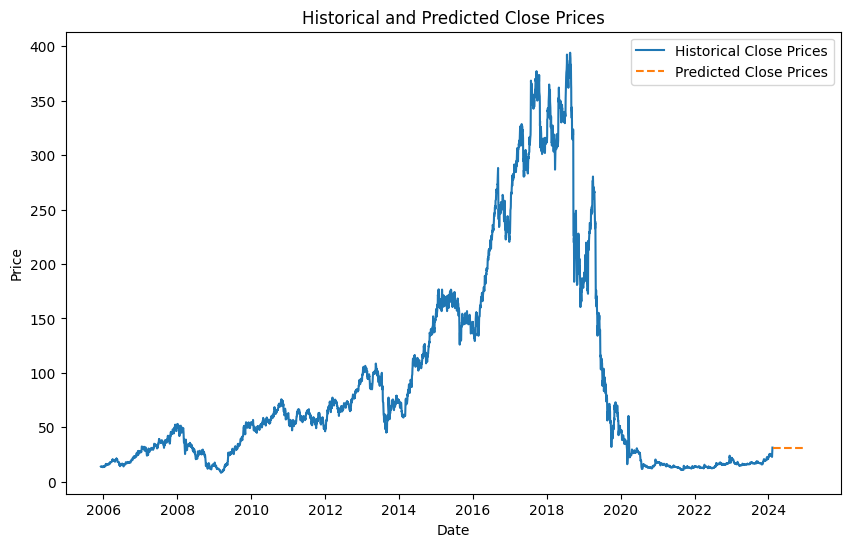

In [12]:
# Step 1: Load historical data
df['Date'] = pd.to_datetime(df['Date'])

# Step 2: Feature selection
X = df[['Open', 'High', 'Low', 'Volume']]  # Features
y = df['Close']  # Target variable

# Step 3: Model selection and training
model = LinearRegression()
model.fit(X, y)

# Step 4: Future date generation
future_dates = pd.date_range(start='2024-02-12', end='2024-12-31')

# Step 5: Prediction
future_data = pd.DataFrame({'Date': future_dates})
future_data['Open'] = df['Open'].iloc[-1]  # Fill with last available value for Open
future_data['High'] = df['High'].iloc[-1]  # Fill with last available value for High
future_data['Low'] = df['Low'].iloc[-1]    # Fill with last available value for Low
future_data['Volume'] = df['Volume'].iloc[-1]  # Fill with last available value for Volume
future_predictions = model.predict(future_data[['Open', 'High', 'Low', 'Volume']])

# Step 6: Visualization
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], label='Historical Close Prices')
plt.plot(future_dates, future_predictions, label='Predicted Close Prices', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Historical and Predicted Close Prices')
plt.legend()
plt.show()


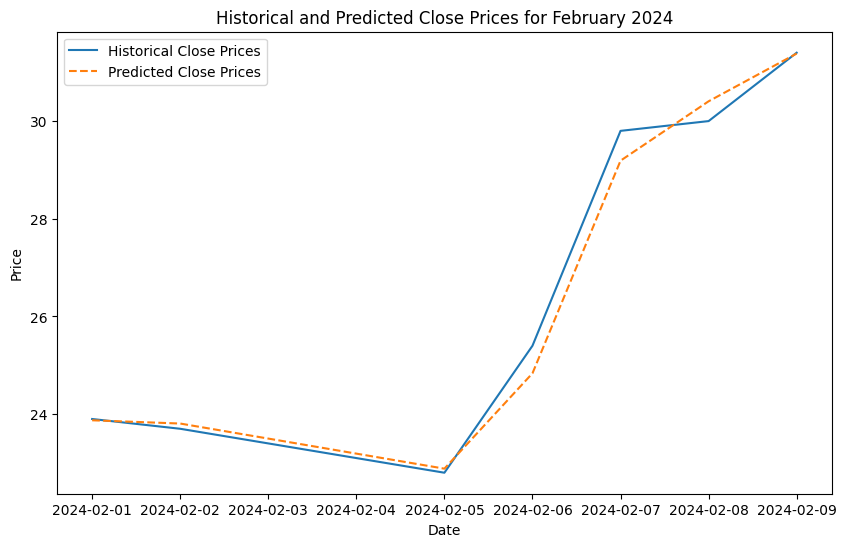

In [16]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load historical data
df['Date'] = pd.to_datetime(df['Date'])

# Prepare the data
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

# Create and train the model
model = LinearRegression()
model.fit(X, y)

# Generate dates for each month from February 2024 to December 2024
start_date = datetime(2024, 2, 1)
end_date = datetime(2024, 12, 31)
current_date = start_date

while current_date <= end_date:
    # Filter data for the current month
    current_month_data = df[(df['Date'] >= current_date) & (df['Date'] < current_date + timedelta(days=30))]
    
    # If there is data for the current month, predict the closing price and plot
    if not current_month_data.empty:
        X_month = current_month_data[['Open', 'High', 'Low', 'Volume']]
        predictions = model.predict(X_month)
        
        plt.figure(figsize=(10, 6))
        plt.plot(current_month_data['Date'], current_month_data['Close'], label='Historical Close Prices')
        plt.plot(current_month_data['Date'], predictions, label='Predicted Close Prices', linestyle='--')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.title(f'Historical and Predicted Close Prices for {current_date.strftime("%B %Y")}')
        plt.legend()
        plt.show()
    
    # Move to the next month
    current_date += timedelta(days=30)
